# Intro to data processing using Pandas

### EAS2655

Most of the exciting developments in seamless data analysis, particularly for large Earth Science datasets are happening in python. In recent years, robust and open ecosystems have been developed around tools like xarray and Pandas which make it very easy to load in large data sets, manipulate them in various ways and produce beautiful plots. This notebook will serve as a basic overview of Pandas/Geopandas packages. Most of this notebook is based on [Project Pythia by Brian Rose](https://foundations.projectpythia.org/) and the [Earth and Environmental Data Science Course](https://earth-env-data-science.github.io/). If you'd like to learn more, the tutorials at the above link are highly recommended.

In [1]:
from datetime import timedelta

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Pandas

Pandas is a very powerful library for working with tabular data (e.g., spreadsheets, comma-separated-value files, or database printouts; all of these are quite common for geoscientific data). It allows us to use labels for our data; this, in turn, allows us to write expressive and robust code to manipulate the data.

Key features of Pandas are the abilities to read in tabular data and to slice and dice data, as well as exploratory analysis tools native to the library. 

A Series represents a one-dimensional array of data. The main difference between a Series and numpy array is that a Series has an index. The index contains the labels that we use to access the data.

In [2]:
names = ['Mercury', 'Venus', 'Earth']
values = [0.3e24, 4.87e24, 5.97e24]
masses = pd.Series(values, index=names)
masses

Mercury    3.000000e+23
Venus      4.870000e+24
Earth      5.970000e+24
dtype: float64

- Pandas series have built-in plotting methods

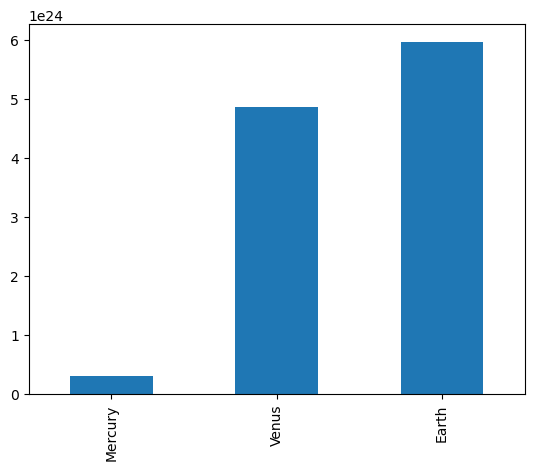

In [3]:
masses.plot(kind='bar')
plt.show()

- Arithmetic operations and most numpy function can be applied to Series. An important point is that the Series keep their index during such operations.

In [4]:
np.log(masses) / masses**2

Mercury    6.006452e-46
Venus      2.396820e-48
Earth      1.600655e-48
dtype: float64

- We can index the series using strings, which is very handy

In [5]:
masses.loc['Earth']

5.97e+24

In [6]:
masses.loc[['Venus', 'Earth']]

Venus    4.870000e+24
Earth    5.970000e+24
dtype: float64

In [7]:
masses.loc['Mercury':'Earth'] #slicing

Mercury    3.000000e+23
Venus      4.870000e+24
Earth      5.970000e+24
dtype: float64

- There is a lot more to Series, but they are limit to a single “column”. A more useful Pandas data structure is the DataFrame. A DataFrame is basically a bunch of series that share the same index. It’s a lot like a table in a spreadsheet.

In [8]:
# first we create a dictionary
data = {'mass': [0.3e24, 4.87e24, 5.97e24],       # kg
        'diameter': [4879e3, 12_104e3, 12_756e3], # m
        'rotation_period': [1407.6, np.nan, 23.9] # h
       }
df = pd.DataFrame(data, index=['Mercury', 'Venus', 'Earth'])
df

,mass,diameter,rotation_period
Mercury,3.000000e+23,4879000.0,1407.6
Venus,4.870000e+24,12104000.0,NaN
Earth,5.970000e+24,12756000.0,23.9


- We can do many different arithmetic or statistical operations on a DataFrame

In [9]:
df.min()

mass               3.000000e+23
diameter           4.879000e+06
rotation_period    2.390000e+01
dtype: float64

In [10]:
df.mean()

mass               3.713333e+24
diameter           9.913000e+06
rotation_period    7.157500e+02
dtype: float64

In [11]:
df.describe()

,mass,diameter,rotation_period
count,3.000000e+00,3.000000e+00,2.000000
mean,3.713333e+24,9.913000e+06,715.750000
std,3.006765e+24,4.371744e+06,978.423653
min,3.000000e+23,4.879000e+06,23.900000
25%,2.585000e+24,8.491500e+06,369.825000
50%,4.870000e+24,1.210400e+07,715.750000
75%,5.420000e+24,1.243000e+07,1061.675000
max,5.970000e+24,1.275600e+07,1407.600000


- Indexing is made very easy with dataframes

In [12]:
df['mass']
# returns a Series

Mercury    3.000000e+23
Venus      4.870000e+24
Earth      5.970000e+24
Name: mass, dtype: float64

In [13]:
df[['mass','diameter']]
# returns a DataFrame

,mass,diameter
Mercury,3.000000e+23,4879000.0
Venus,4.870000e+24,12104000.0
Earth,5.970000e+24,12756000.0


In [14]:
df.loc['Earth']

mass               5.970000e+24
diameter           1.275600e+07
rotation_period    2.390000e+01
Name: Earth, dtype: float64

In [15]:
df.loc['Earth', 'mass']

5.97e+24

- Adding new columns is as easy as referencing an undefined column

In [16]:
df['density'] = df.mass / (4/3 * np.pi * (df.diameter/2)**3)
df

,mass,diameter,rotation_period,density
Mercury,3.000000e+23,4879000.0,1407.6,4933.216530
Venus,4.870000e+24,12104000.0,NaN,5244.977070
Earth,5.970000e+24,12756000.0,23.9,5493.285577


- New series or dataframes can be added to existing dataframes

In [17]:
temperature = pd.Series([167, 464, 15, -65],
                     index=['Mercury', 'Venus', 'Earth', 'Mars'],
                     name='temperature')
df2 = df.join(temperature, how='right')
df2

,mass,diameter,rotation_period,density,temperature
Mercury,3.000000e+23,4879000.0,1407.6,4933.216530,167
Venus,4.870000e+24,12104000.0,NaN,5244.977070,464
Earth,5.970000e+24,12756000.0,23.9,5493.285577,15
Mars,NaN,NaN,NaN,NaN,-65


In [18]:
everyone = df2.reindex(['Mercury', 'Venus', 'Mars', 'Earth'])
everyone

,mass,diameter,rotation_period,density,temperature
Mercury,3.000000e+23,4879000.0,1407.6,4933.216530,167
Venus,4.870000e+24,12104000.0,NaN,5244.977070,464
Mars,NaN,NaN,NaN,NaN,-65
Earth,5.970000e+24,12756000.0,23.9,5493.285577,15


- Indexing with a boolean is easy

In [19]:
bigguys = df[df.mass > 4e24]
bigguys

,mass,diameter,rotation_period,density
Venus,4.870000e+24,12104000.0,NaN,5244.977070
Earth,5.970000e+24,12756000.0,23.9,5493.285577


- Plotting functions from matplotlib are build directly into Pandas

<Axes: xlabel='mass', ylabel='diameter'>

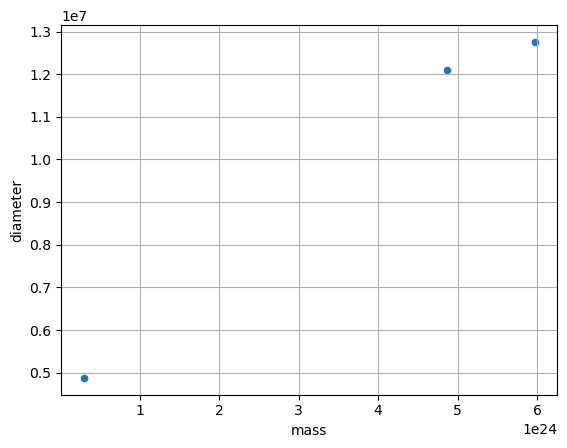

In [20]:
df.plot(kind='scatter', x='mass', y='diameter', grid=True)

<Axes: >

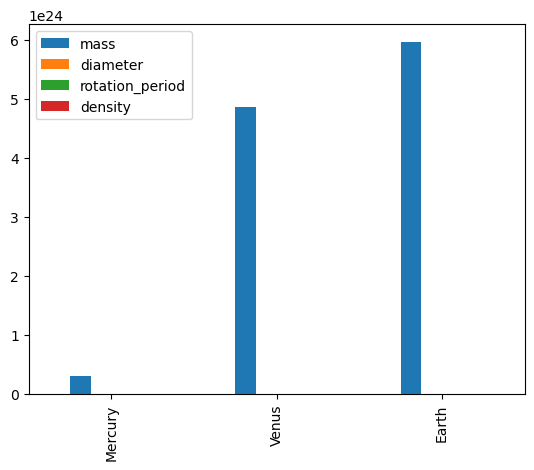

In [21]:
df.plot(kind='bar')

### Input from/output to .csv file 

- Loading uncompressed data directly into a dataframe makes manipulating the data much easier. Here we need to know that the file is space-delimited, not comma delimited which is the default assumption of the read_csv function.

In [22]:
# Generates Pandas DataFrame from .csv file
#  Uses , as separator and missing value is set to -999
#  Also the first column is the index
df_bos = pd.read_csv('Boston.csv', sep=',' , na_values=-999, index_col=0)
df_bos

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL
Year,,,,,,,,,,,,,
1872,NaN,NaN,26.5,46.6,59.3,68.9,75.7,73.0,64.4,51.9,40.6,23.1,53.0
1873,25.1,26.4,33.9,44.9,56.5,67.3,72.9,69.8,62.8,53.5,33.3,32.1,48.2
1874,30.5,27.0,34.4,38.8,55.5,66.1,72.9,68.1,64.4,53.2,41.6,31.3,48.6
1875,20.1,22.3,31.3,42.5,57.9,66.7,72.1,71.0,59.6,50.1,34.9,29.6,46.5
1876,30.7,27.5,33.5,43.9,54.6,68.9,74.0,70.3,59.9,48.3,41.4,22.2,47.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,30.7,33.5,39.1,51.7,57.8,68.2,78.7,74.1,68.0,57.4,42.8,37.2,53.3
2020,38.0,37.8,41.8,44.6,56.8,69.2,75.3,74.1,65.6,54.7,48.0,36.0,53.5
2021,31.0,30.8,42.0,50.8,61.4,74.4,72.4,76.9,69.7,59.9,44.7,39.2,54.4


In [23]:
df_bos.describe() #dump info about dataframe

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL
count,151.000000,151.000000,152.000000,151.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,150.000000,152.000000
mean,29.131788,29.994040,37.477632,47.543709,58.029605,67.326316,73.073684,71.390789,64.492763,54.359868,43.944079,33.562667,50.909211
std,4.389933,3.944485,3.673247,2.613416,2.578486,2.378623,2.120813,2.239009,2.237137,2.650459,3.012902,4.268954,1.569931
min,19.700000,17.500000,26.500000,38.800000,50.500000,59.800000,67.900000,65.000000,59.600000,47.700000,33.300000,21.700000,46.500000
25%,25.950000,27.050000,34.825000,45.450000,56.300000,65.650000,71.600000,69.975000,62.900000,52.600000,41.975000,30.700000,49.900000
50%,29.100000,30.400000,37.400000,47.900000,57.900000,67.300000,73.100000,71.100000,64.500000,54.300000,43.800000,33.850000,50.900000
75%,32.000000,32.600000,39.325000,49.250000,59.925000,68.900000,74.350000,73.100000,65.700000,56.000000,45.725000,36.300000,51.925000
max,39.300000,38.100000,47.200000,55.100000,63.700000,74.400000,78.700000,77.400000,70.600000,61.500000,51.800000,45.300000,54.400000


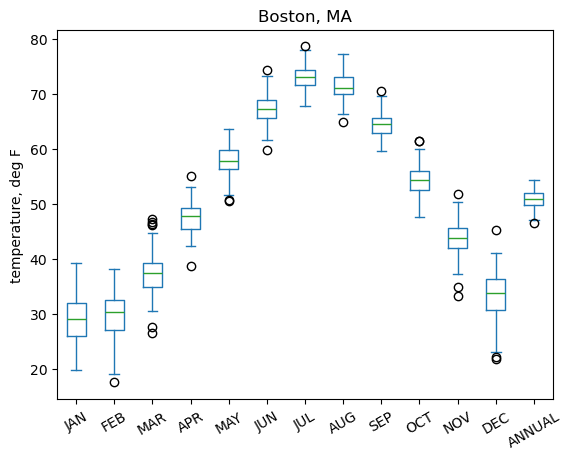

In [24]:
# generate box plot directly from DataFrame
df_bos.plot(kind='box')
plt.xticks(rotation=30)
plt.ylabel('temperature, deg F')
plt.title('Boston, MA')
plt.show()

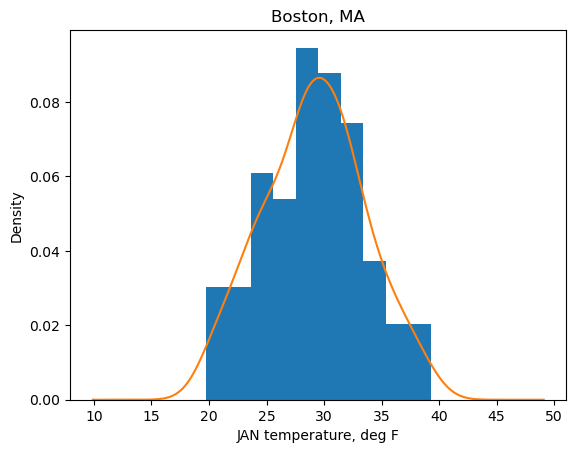

In [25]:
# generate histogram directly from DataFrame
df_bos['JAN'].plot(kind='hist',density=True)
df_bos['JAN'].plot(kind='density')
plt.xlabel('JAN temperature, deg F')
plt.title('Boston, MA')
plt.show()

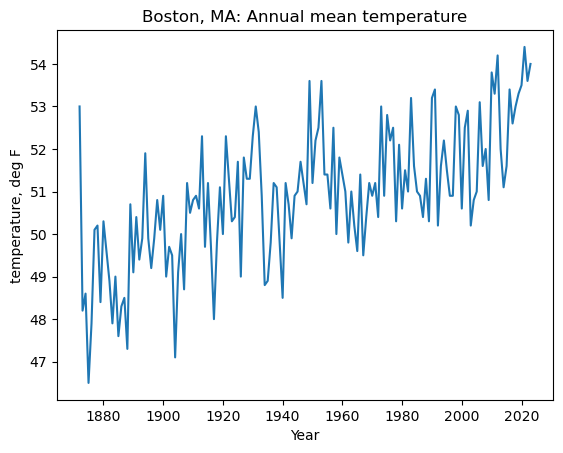

In [26]:
# plot the time series of Annual mean temperature
df_bos['ANNUAL'].plot()
plt.ylabel('temperature, deg F')
plt.title('Boston, MA: Annual mean temperature')
plt.show()

### Datetime
- Most modern datasets that include temporal information (time and date when an observation was made) use a format for time called "datetime" ([see Project Pythia for detail](https://foundations.projectpythia.org/core/datetime/datetime.html)). What you should know is that datetime format has information as: YYYY-MM-DD HH:MM:SS. This can also be shortened if further precision (i.e. time or minutes) is not available, or can include arbitrarily high precision (decimal seconds). Converting from other time format to datetime can make many different ways of processing data much easier (especially when using Pandas, see later).

- We can use datetime to index data. Plotting with datetime is very nice

In [27]:
# This line creates a time axis between start and end date with a defined frequency (day)
two_years = pd.date_range(start='2014-01-01', end='2016-01-01', freq='D')
# It returns DatetimeIndex
two_years

DatetimeIndex(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04',
               '2014-01-05', '2014-01-06', '2014-01-07', '2014-01-08',
               '2014-01-09', '2014-01-10',
               ...
               '2015-12-23', '2015-12-24', '2015-12-25', '2015-12-26',
               '2015-12-27', '2015-12-28', '2015-12-29', '2015-12-30',
               '2015-12-31', '2016-01-01'],
              dtype='datetime64[ns]', length=731, freq='D')

In [28]:
# This line creates a sine function with the period of 365 days as Pandas Series object
timeseries = pd.Series(np.sin(2 *np.pi *two_years.dayofyear / 365),
                       index=two_years)
# returns a Pandas Series
timeseries

2014-01-01    1.721336e-02
2014-01-02    3.442161e-02
2014-01-03    5.161967e-02
2014-01-04    6.880243e-02
2014-01-05    8.596480e-02
                  ...     
2015-12-28   -5.161967e-02
2015-12-29   -3.442161e-02
2015-12-30   -1.721336e-02
2015-12-31    6.432491e-16
2016-01-01    1.721336e-02
Freq: D, Length: 731, dtype: float64

<Axes: >

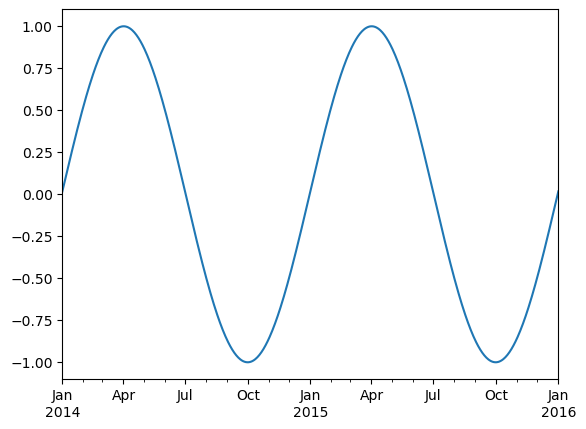

In [29]:
# make a plot directly from the Series
timeseries.plot()

<Axes: >

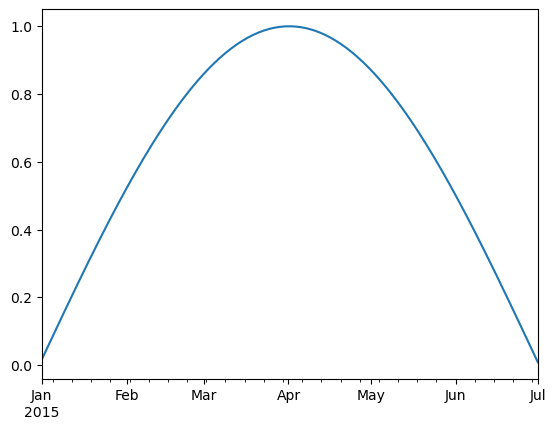

In [30]:
timeseries.loc['2015-01-01':'2015-07-01'].plot() #slicing

### Getting data from a URL
- You can enter URL of the data from a known source
- First lets pull in some large earthquake catalogue data

In [31]:
df = pd.read_csv('http://www.ldeo.columbia.edu/~rpa/usgs_earthquakes_2014.csv', 
                 parse_dates=['time'], index_col='id')
df['country'] = df.place.str.split(', ').str[-1]
df_small = df[df.mag<4]
df = df[df.mag>4]
df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type,country
id,,,,,,,,,,,,,,,
usc000mqlp,2014-01-31 23:08:03.660,-4.9758,153.9466,110.18,4.2,mb,NaN,98.0,1.940,0.61,us,2014-04-08T01:43:19.000Z,"115km ESE of Taron, Papua New Guinea",earthquake,Papua New Guinea
usc000mqln,2014-01-31 22:54:32.970,-28.1775,-177.9058,95.84,4.3,mb,NaN,104.0,1.063,1.14,us,2014-04-08T01:43:19.000Z,"120km N of Raoul Island, New Zealand",earthquake,New Zealand
usc000mqls,2014-01-31 22:49:49.740,-23.1192,179.1174,528.34,4.4,mb,NaN,80.0,5.439,0.95,us,2014-04-08T01:43:19.000Z,South of the Fiji Islands,earthquake,South of the Fiji Islands
usc000mf1x,2014-01-31 22:19:44.330,51.1569,-178.0910,37.50,4.2,mb,NaN,NaN,NaN,0.83,us,2014-04-08T01:43:19.000Z,"72km E of Amatignak Island, Alaska",earthquake,Alaska
usc000mqlm,2014-01-31 21:56:44.320,-4.8800,153.8434,112.66,4.3,mb,NaN,199.0,1.808,0.79,us,2014-04-08T01:43:19.000Z,"100km ESE of Taron, Papua New Guinea",earthquake,Papua New Guinea
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
usc000t6yh,2014-12-01 02:56:07.950,21.2031,143.5484,11.05,4.4,mb,NaN,107.0,5.996,0.87,us,2015-02-24T00:35:14.040Z,"158km WNW of Farallon de Pajaros, Northern Mar...",earthquake,Northern Mariana Islands
usc000t6y2,2014-12-01 01:50:23.380,-7.8798,106.4275,52.10,4.3,mb,NaN,119.0,1.412,1.50,us,2015-02-24T00:35:14.040Z,"57km SSW of Cibungur, Indonesia",earthquake,Indonesia
usc000t6y1,2014-12-01 01:04:17.890,7.1429,126.8844,176.67,4.3,mb,NaN,134.0,1.297,0.87,us,2015-02-24T00:35:14.040Z,"37km ESE of Santiago, Philippines",earthquake,Philippines


<Axes: ylabel='Frequency'>

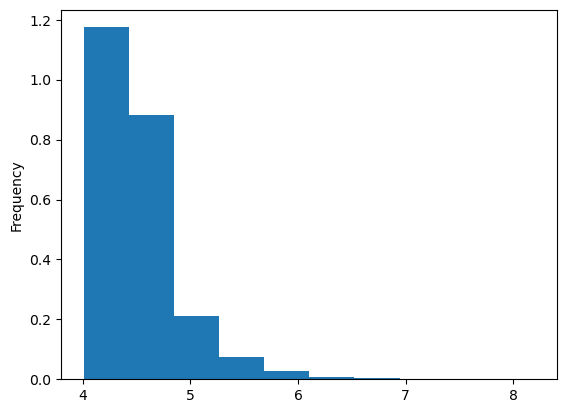

In [32]:
df.mag.plot(kind='hist',density=True)

In [33]:
# You can save a local copy by .to_csv 
df.to_csv('my_own_copy.csv')

- One of the most powerful functions of Pandas is groupby, which allows you to do operations on data grouped by different attributes. It takes practice to get "good" at groupby, but worth it. 

The workflow with groupby can be divided into three general steps:

1. Split: Partition the data into different groups based on some criterion.

2. Apply: Do some caclulation within each group. Different types of “apply” steps might be

    (a) Aggregation: Get the mean or max within the group.

    (b) Transformation: Normalize all the values within a group

    (c) Filtration: Eliminate some groups based on a criterion.

3. Combine: Put the results back together into a single object.

- Here we split by country name

In [34]:
gb = df.groupby('country') 
#list(gb.groups.keys())

- Then we aggregate - in this case we take the magnitude and find the the ten countries with the largest Earthquakes (by MM). Doing groupby first ensures that we don't just get the ten largest earthquakes. We groupby, find the max for each group, then find the then largest.

In [35]:
gb.mag.max().nlargest(10)

country
Chile                         8.2
Alaska                        7.9
Solomon Islands               7.6
Papua New Guinea              7.5
El Salvador                   7.3
Mexico                        7.2
Fiji                          7.1
Indonesia                     7.1
Southern East Pacific Rise    7.0
                              6.9
Name: mag, dtype: float64

- Multiple functions can also be done at once

In [36]:
gb.mag.aggregate([min, max, np.mean])

/var/folders/lv/jjy5trsn1m145hdm36820p9c0000gn/T/ipykernel_83428/4070470272.py:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  gb.mag.aggregate([min, max, np.mean])
/var/folders/lv/jjy5trsn1m145hdm36820p9c0000gn/T/ipykernel_83428/4070470272.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  gb.mag.aggregate([min, max, np.mean])
/var/folders/lv/jjy5trsn1m145hdm36820p9c0000gn/T/ipykernel_83428/4070470272.py:1: FutureWarning: The provided callable <function mean at 0x11a4819e0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass

,min,max,mean
country,,,
,4.1,6.9,4.582544
Afghanistan,4.1,5.6,4.410656
Alaska,4.1,7.9,4.515025
Albania,4.1,5.0,4.391667
Algeria,4.1,5.5,4.583333
...,...,...,...
Zambia,4.1,5.3,4.457143
north of Ascension Island,4.4,4.4,4.400000
northern Mid-Atlantic Ridge,4.7,4.7,4.700000


- This can be combined with a plotting function all in a single line of code

<Axes: xlabel='country'>

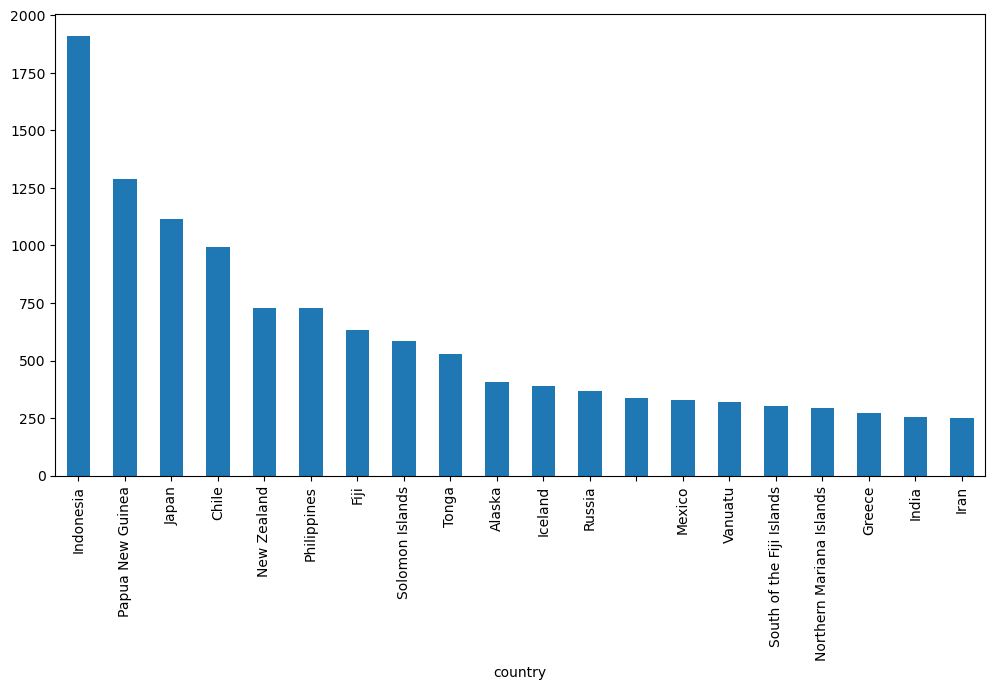

In [37]:
df.groupby('country').mag.count().nlargest(20).plot(kind='bar', figsize=(12,6)) 
#bar graph of countries by number of earthquakes

The key difference between aggregation and transformation is that aggregation returns a smaller object than the original, indexed by the group keys, while transformation returns an object with the same index (and same size) as the original object. Groupby + transformation is used when applying an operation that requires information about the whole group. Here we normalize earthquakes by magnitude within country grouping

In [38]:
def normalize(x):
    return (x - x.mean())/x.std()

mag_normalized_by_country = gb.mag.transform(normalize)
mag_normalized_by_country

id
usc000mqlp   -0.915774
usc000mqln   -0.675696
usc000mqls   -0.282385
usc000mf1x   -0.684915
usc000mqlm   -0.666807
                ...   
usc000t6yh   -0.281723
usc000t6y2   -0.451617
usc000t6y1   -0.627247
usb000t1gp   -0.629262
usc000t6yn    0.043277
Name: mag, Length: 16371, dtype: float64